In [67]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from scipy.stats import binned_statistic_2d

import warnings
warnings.filterwarnings("ignore", message="The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.", category=FutureWarning, module="yfinance.utils")

In [2]:
tickers = ["^GDAXI", "^FCHI", "^FTSE", "^STOXX50E"]
data = yf.download(tickers[0], start="1991-01-01", end="2024-01-01")
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-01-02,1359.430054,1359.430054,1359.430054,1359.430054,1359.430054,0
1991-01-03,1370.060059,1370.060059,1370.060059,1370.060059,1370.060059,0
1991-01-04,1390.079956,1390.079956,1390.079956,1390.079956,1390.079956,0
1991-01-07,1356.479980,1356.479980,1356.479980,1356.479980,1356.479980,0
1991-01-08,1351.209961,1351.209961,1351.209961,1351.209961,1351.209961,0


### Getting initial information

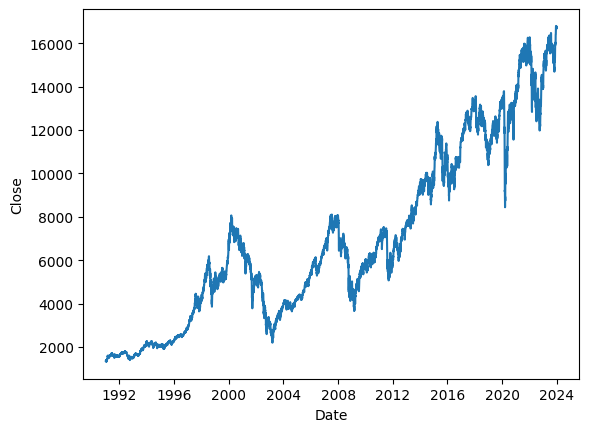

In [23]:
sn.lineplot(data=data, x=data.index, y=data.Close);

In [50]:
n_y = data.index.year.unique().shape[0]
n_d = data.index.day.shape[0]
m,n = data.shape
frequency = int(m/n_y)

print(m, n_y, n_d, frequency)

8352 33 8352 253


In [42]:
data.index.min(), data.index.max()

(Timestamp('1991-01-02 00:00:00'), Timestamp('2023-12-29 00:00:00'))

### Histograms and differentiation

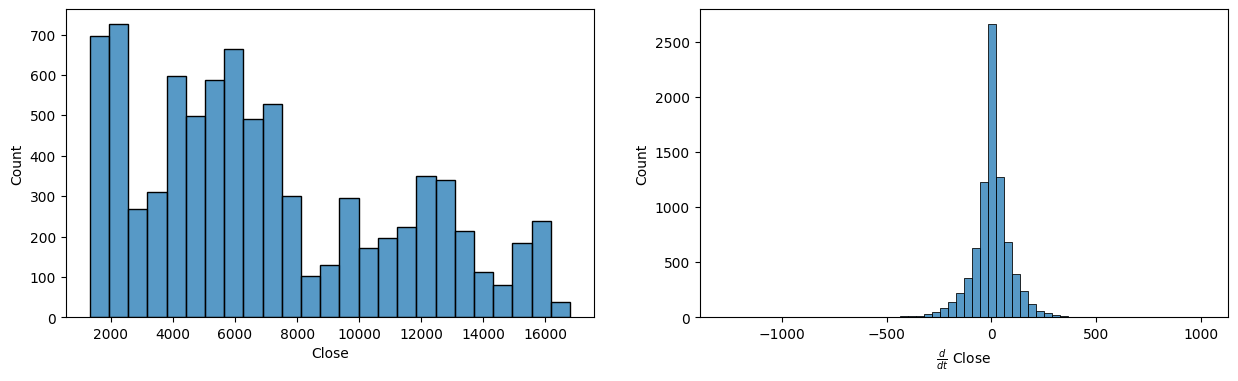

In [63]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
sn.histplot(data=data, x='Close', ax=ax[0])
sn.histplot(x=np.diff(data.Close), ax=ax[1], bins=60)
ax[1].set_xlabel(r'$\frac{d}{dt}$ Close')
plt.show()

In [118]:
data_amzn = yf.download('AMZN', start="1997-05-15", end="2024-01-01")
data_aapl = yf.download('AAPL', start="1997-05-15", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


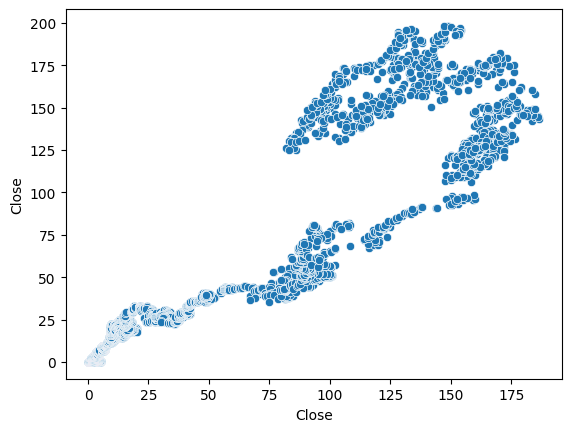

In [119]:
sn.scatterplot(x=data_amzn.Close, y=data_aapl.Close);

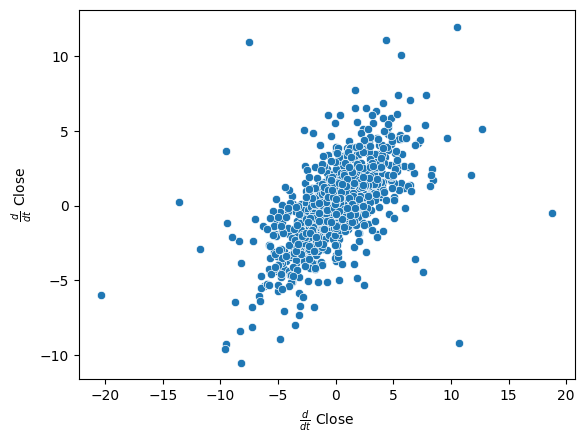

In [120]:
sn.scatterplot(x=np.diff(data_amzn.Close), y=np.diff(data_aapl.Close))
plt.xlabel(r'$\frac{d}{dt}$ Close')
plt.ylabel(r'$\frac{d}{dt}$ Close');

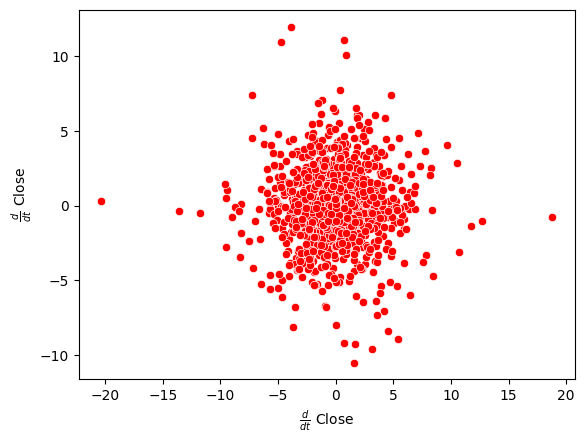

In [121]:
sn.scatterplot(x=np.roll(np.diff(data_amzn.Close), 1), y=np.diff(data_aapl.Close), c='r')
plt.xlabel(r'$\frac{d}{dt}$ Close')
plt.ylabel(r'$\frac{d}{dt}$ Close');

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


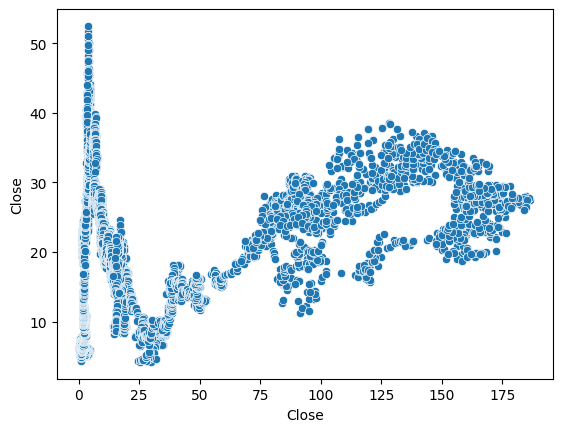

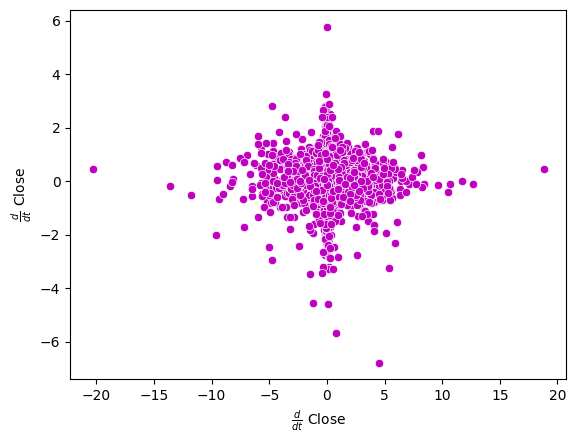

In [133]:
data_amzn = yf.download('AMZN', start="2000-01-03", end="2024-01-01")
data_petr4 = yf.download('PETR4.SA', start="2000-01-03", end="2024-01-01")

delta = data_amzn.shape[0] - data_petr4.shape[0]
data_amzn = data_amzn.iloc[:-delta]

sn.scatterplot(x=data_amzn.Close, y=data_petr4.Close)
plt.show()

sn.scatterplot(x=np.roll(np.diff(data_amzn.Close), 1), y=np.diff(data_petr4.Close), c='m')
plt.xlabel(r'$\frac{d}{dt}$ Close')
plt.ylabel(r'$\frac{d}{dt}$ Close');

### Window Functions

In [4]:
x = np.random.normal(loc=0, scale=10, size=101) + np.arange(1,102)

Rolling window:

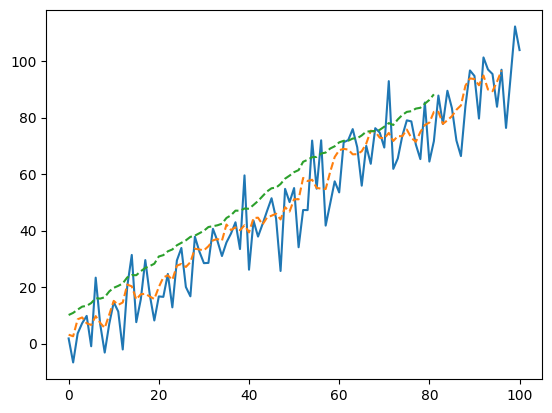

In [4]:
plt.plot(x)

x_conv_5 = np.convolve(x, np.ones(5)/5, mode='valid')
x_conv_20 = np.convolve(x, np.ones(20)/20, mode='valid')

plt.plot(x_conv_5, '--')
plt.plot(x_conv_20, '--');

Minimum rolling window:

<Axes: >

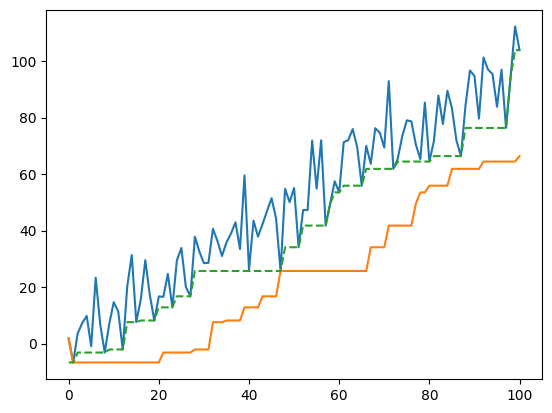

In [22]:
x_pd = pd.Series(x)
f1 = x_pd.rolling(window=20, min_periods=1).min()
f2 = x_pd.iloc[::-1].rolling(window=20, min_periods=1).min().iloc[::-1]
sn.lineplot(x)
sn.lineplot(f1)
sn.lineplot(f2, linestyle='--')

### Autocorrelation

In [32]:
y = np.random.normal(loc=0, scale=100, size=201) + np.arange(1,202)
data_air = pd.read_csv('data/AirPassengers.csv')
data_air.index = pd.to_datetime(data_air.Date)
data_air.drop(columns='Date', inplace=True)

**ACF**

For the fake data:

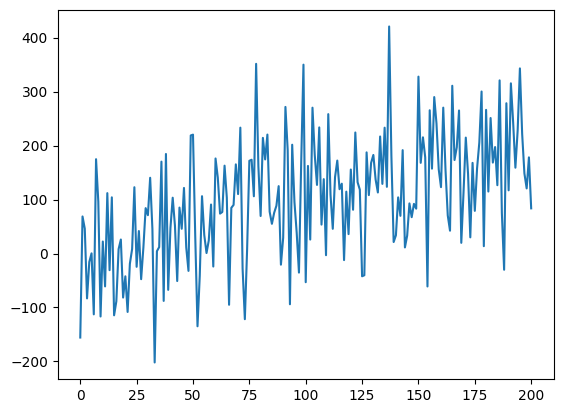

In [20]:
plt.plot(y);

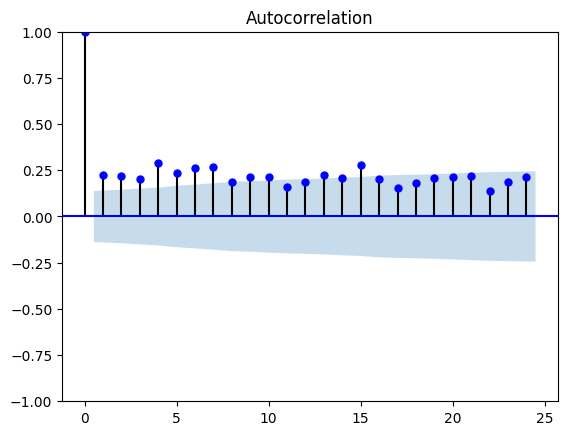

In [21]:
plot_acf(y, color='b', vlines_kwargs={'color':'k'})
plt.show()

For the air passengers dataset:

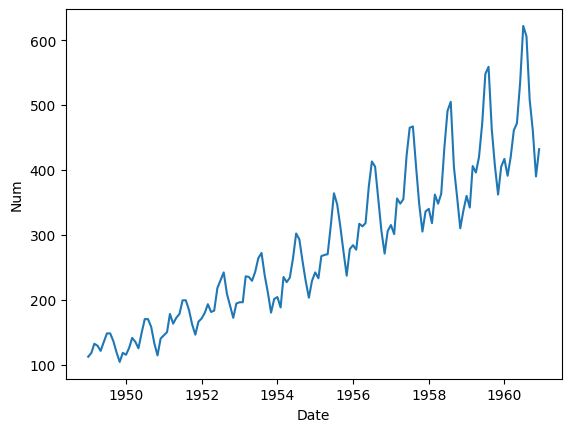

In [38]:
sn.lineplot(data_air, x=data_air.index, y=data_air.Num);

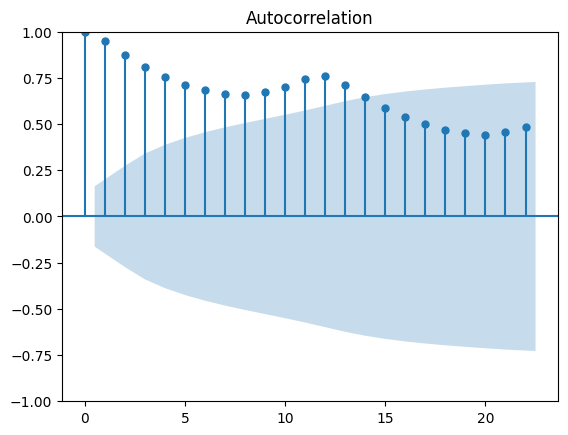

In [35]:
plot_acf(data_air);

**PACF**

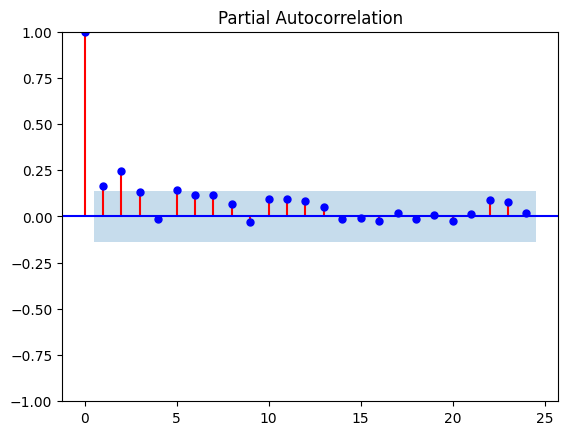

In [37]:
plot_pacf(y, color='b', vlines_kwargs={'color':'r'});

### Plots

Gantt plot:

In [15]:
data_don = pd.read_csv('data/donations.csv')
data_don.timestamp = pd.to_datetime(data_don.timestamp)
print(data_don.shape)
data_don.head()

(2676, 3)


,amount,timestamp,user
0,25.0,2017-11-12 11:13:44,0.0
1,50.0,2015-08-25 19:01:45,0.0
2,25.0,2015-03-26 12:03:47,0.0
3,50.0,2016-07-06 12:24:55,0.0
4,50.0,2016-05-11 18:13:04,1.0


In [43]:
data_don['start'] = data_don.timestamp
data_don['end'] = data_don.timestamp
data_don_sum = data_don.groupby('user').agg({'amount':'sum','start':'min','end':'max'}).reset_index()
data_don_sum.tail()

,user,amount,start,end
563,991.0,50.0,2016-10-27 21:27:47,2017-08-06 13:35:26
564,992.0,375.0,2015-09-09 12:59:57,2018-05-20 11:55:44
565,993.0,50.0,2017-11-02 12:17:06,2017-11-02 12:17:06
566,995.0,2000.0,2016-09-13 21:09:47,2017-09-29 20:03:01
567,998.0,50.0,2018-01-03 19:24:24,2018-01-03 19:24:24


In [51]:
data_don_sum.drop(data_don_sum.query('start == end').index, inplace=True)

In [66]:
d_sampled = data_don_sum.sample(20)

fig = go.Figure()

for idx, row in d_sampled.iterrows():
    fig.add_trace(go.Scatter(x=[row.start, row.end], y=[row.user, row.user],
                             name=row['user'], line=dict(width=5), marker=dict(size=10)))

fig.update_layout(xaxis_title='Timeline', yaxis_title='User')
fig.show()

2D plots:

In [34]:
data_air = pd.read_csv('data/AirPassengers.csv')

data_air.Date = pd.to_datetime(data_air.Date)
data_air.index = data_air.Date
data_air['Month'] = data_air.Date.dt.month
data_air['Year'] = data_air.Date.dt.year
data_air.drop(columns='Date', inplace=True)
data_air.head()

,Num,Month,Year
Date,,,
1949-01-01,112,1,1949
1949-02-01,118,2,1949
1949-03-01,132,3,1949
1949-04-01,129,4,1949
1949-05-01,121,5,1949


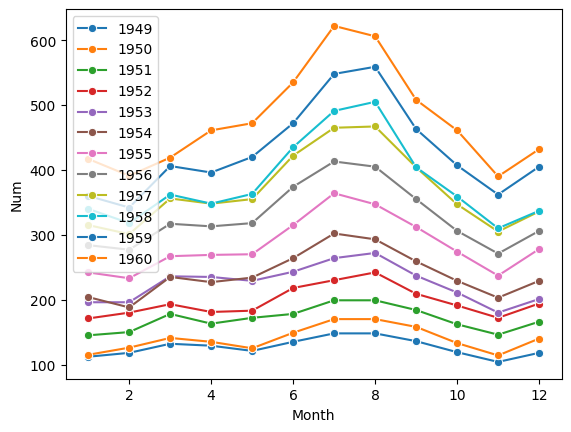

In [55]:
years = data_air.Year.unique()

for y in years:
    d_plot = data_air.groupby('Year').get_group(y)
    sn.lineplot(d_plot, x='Month', y='Num', label=y, marker='o')

plt.legend()
plt.show()

In [83]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=data_air.Month, y=data_air.Year, z=data_air.Num, mode='markers', marker=dict(color=data_air['Month'], colorscale='Viridis', size=5)))
fig.update_layout(scene=dict(xaxis=dict(title='Month'),
                             yaxis=dict(title='Year'),
                             zaxis=dict(title='PassengerCount')),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()